In [1]:
#Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.table import Table, hstack
from scipy.optimize import curve_fit
from sympy import *
import math
from mpmath import *
from pandas.compat import StringIO
from numpy.linalg import inv
from scipy import linalg
from scipy import interpolate
from scipy import integrate
from scipy.integrate import quad
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KDTree
import scipy.spatial as spatial

### Input weights file
This file also has COSMOS photo-zs, HSC photo-z's, positions and  hsc magnitudes). 
Note: these weights were found based on the density of the whole HSC sample in the COSMOS field

In [2]:
#The COSMOS 30-band data matched to some of the HSC data in the COSMOS field
weights_path= '../../../cosmos_hsc_weights.fits'
hdulist = fits.open(weights_path)
weights_data = hdulist[1].data
weights_columns= hdulist[1].columns

In [3]:
weights= weights_data['weight']
hsc_z= weights_data['hsc_pz_best_eab']
COSMOS_z= weights_data['cosmos_photoz']

In [12]:
#Input the number of galaxies in the whole HSC field
N_photo_tot = 537547

#Input redshift bin info - weights will be summed in each redshift bin
num_bin= 100
bins= np.linspace(0, 4.0, num=100, endpoint=False)
bins=np.append(bins,4)

In [13]:
weights_tot= np.sum(weights)  #Sum weights over all matched COSMOS galaxies

### N(z) with whole galaxy sample

In [14]:
def weights_per_bin(num_bin,COSMOS_z, bins, weights):
    
    #Weights per redshift bin  
    weights_bin= np.zeros(num_bin)

    for j in range(num_bin):
        for i in range(len(COSMOS_z)):
            if COSMOS_z[i]>bins[j] and COSMOS_z[i]<=bins[j+1]:
                weights_bin[j]+=weights[i]
                
    return weights_bin

In [15]:
weights_bin= weights_per_bin(num_bin, COSMOS_z, bins, weights)

In [16]:
def Nz(weights_bin, weights_tot, N_photo_tot):
    P_T_z_delta_z =  np.true_divide(weights_bin, weights_tot)
    N_p_est = P_T_z_delta_z*N_photo_tot
    return N_p_est

In [17]:
N_p_est= Nz(weights_bin, weights_tot, N_photo_tot)

Text(0,0.5,'N(z)')

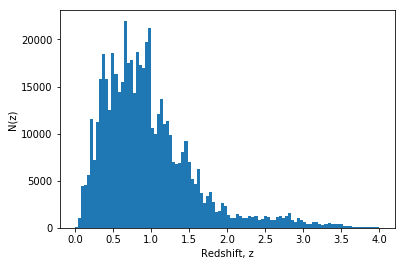

In [19]:
# Nnei= 20
plt.bar(bins[:-1],N_p_est, width= 0.04, align='edge')
plt.xlabel('Redshift, z')
plt.ylabel('N(z)')


### Redshift bins N(z)s

In [20]:
def form_z_bins(weights_data):
    weights_bin1= weights_data[(weights_data['hsc_pz_best_eab']>0.15) & (weights_data['hsc_pz_best_eab']<=0.5)]
    weights_bin2= weights_data[(weights_data['hsc_pz_best_eab']>0.5) & (weights_data['hsc_pz_best_eab']<=0.75)]
    weights_bin3= weights_data[(weights_data['hsc_pz_best_eab']>0.75) & (weights_data['hsc_pz_best_eab']<=1.0)]
    weights_bin4= weights_data[(weights_data['hsc_pz_best_eab']>1.0) & (weights_data['hsc_pz_best_eab']<=1.5)]
    
    return weights_bin1, weights_bin2, weights_bin3, weights_bin4

In [21]:
weights_bin1, weights_bin2, weights_bin3, weights_bin4 = form_z_bins(weights_data)

In [22]:
weights_per_bin_bin1= weights_per_bin(num_bin,weights_bin1['cosmos_photoz'], bins, weights_bin1['weight'])
weights_per_bin_bin2= weights_per_bin(num_bin,weights_bin2['cosmos_photoz'], bins, weights_bin2['weight'])
weights_per_bin_bin3= weights_per_bin(num_bin,weights_bin3['cosmos_photoz'],bins, weights_bin3['weight'])
weights_per_bin_bin4= weights_per_bin(num_bin,weights_bin4['cosmos_photoz'], bins, weights_bin4['weight'])

In [23]:
N_p_est_bin1= Nz(weights_per_bin_bin1, weights_tot, N_photo_tot)
N_p_est_bin2= Nz(weights_per_bin_bin2, weights_tot, N_photo_tot)
N_p_est_bin3= Nz(weights_per_bin_bin3, weights_tot, N_photo_tot)
N_p_est_bin4= Nz(weights_per_bin_bin4, weights_tot, N_photo_tot)

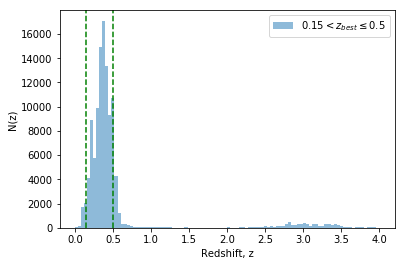

In [26]:
#Bin 1
plt.bar(bins[:-1],N_p_est_bin1, width= 0.04, align='edge', alpha=0.5, label= '$0.15< z_{best}\leq 0.5$')
plt.xlabel('Redshift, z')
plt.ylabel('N(z)')

plt.axvline(x=0.15, ls='dashed', color='g')
plt.axvline(x=0.5, ls='dashed', color='g')

plt.legend()

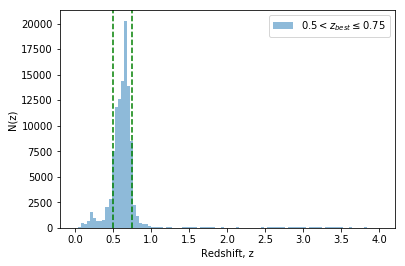

In [27]:
#Bin 2
plt.bar(bins[:-1],N_p_est_bin2, width= 0.04, align='edge',alpha=0.5,label= '$0.5< z_{best}\leq 0.75$')
plt.xlabel('Redshift, z')
plt.ylabel('N(z)')

plt.axvline(x=0.5, ls='dashed', color='g')
plt.axvline(x=0.75, ls='dashed', color='g')
plt.legend()

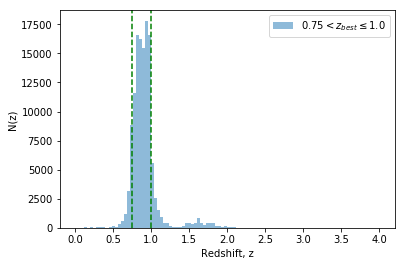

In [28]:
#Bin 3
plt.bar(bins[:-1],N_p_est_bin3, width= 0.04, align='edge',alpha=0.5,label='$0.75< z_{best}\leq 1.0$')
plt.xlabel('Redshift, z')
plt.ylabel('N(z)')

plt.axvline(x=0.75, ls='dashed', color='g')
plt.axvline(x=1.0, ls='dashed', color='g')
plt.legend()

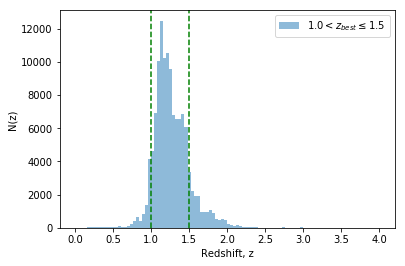

In [29]:
#Bin 4
plt.bar(bins[:-1],N_p_est_bin4, width= 0.04, align='edge',alpha=0.5,label='$1.0< z_{best}\leq 1.5$' )
plt.xlabel('Redshift, z')
plt.ylabel('N(z)')

plt.axvline(x=1.0, ls='dashed', color='g')
plt.axvline(x=1.5, ls='dashed', color='g')
plt.legend()

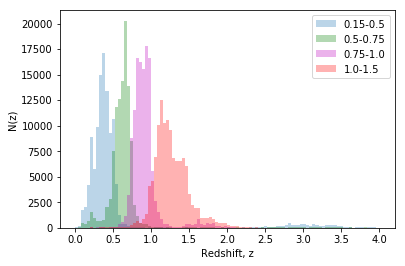

In [30]:
plt.bar(bins[:-1],N_p_est_bin1, width= 0.04,align='edge', alpha=0.3, label='0.15-0.5')

plt.bar(bins[:-1],N_p_est_bin2, width= 0.04, color= 'g',align='edge',alpha=0.3, label= '0.5-0.75')

plt.bar(bins[:-1],N_p_est_bin3, width= 0.04, color= 'm', align='edge',alpha=0.3,label= '0.75-1.0')

plt.bar(bins[:-1],N_p_est_bin4, width= 0.04, color='r', align='edge',alpha=0.3,label= '1.0-1.5')
plt.xlabel('Redshift, z')
plt.ylabel('N(z)')

plt.legend()